# Phy 415 - Worked Problem #3 - Andrew Koren

As we learn new tools to model systems, both analytical and numerical, we're able to build beyond textbook problems and analyze systems that have a little more than average complexity. Very complex systems can be described given enough time, but even a small twist on a common problem can yield interesting dynamics. In this worked problem, we'll be looking at a common electrostatics problem, the behaviour of an electron above an infinite grounded plane, but with the added twist of viewing motion in the system.

## Introduction

Grounded conductors have an interesting affect on nearby electric fields. Since electric fields produce voltages that would disrupt a grounded conductor, electrons in the conductor arrange themselves so as to disperse this voltage, resulting in an electric field which counteracts incoming electric fields. This arrangement does not only negate the voltage inside the conductor, it also creates interesting fields outside the conductor.

In the case of a flat infinite plane (or large compared to the electron), the method of image charges is used to represent this field. If an electron or some charge distribution is placed above the infinite plane, the voltage on the plane would be zero if an oppositely charged distribution was "mirrored" onto the other side.

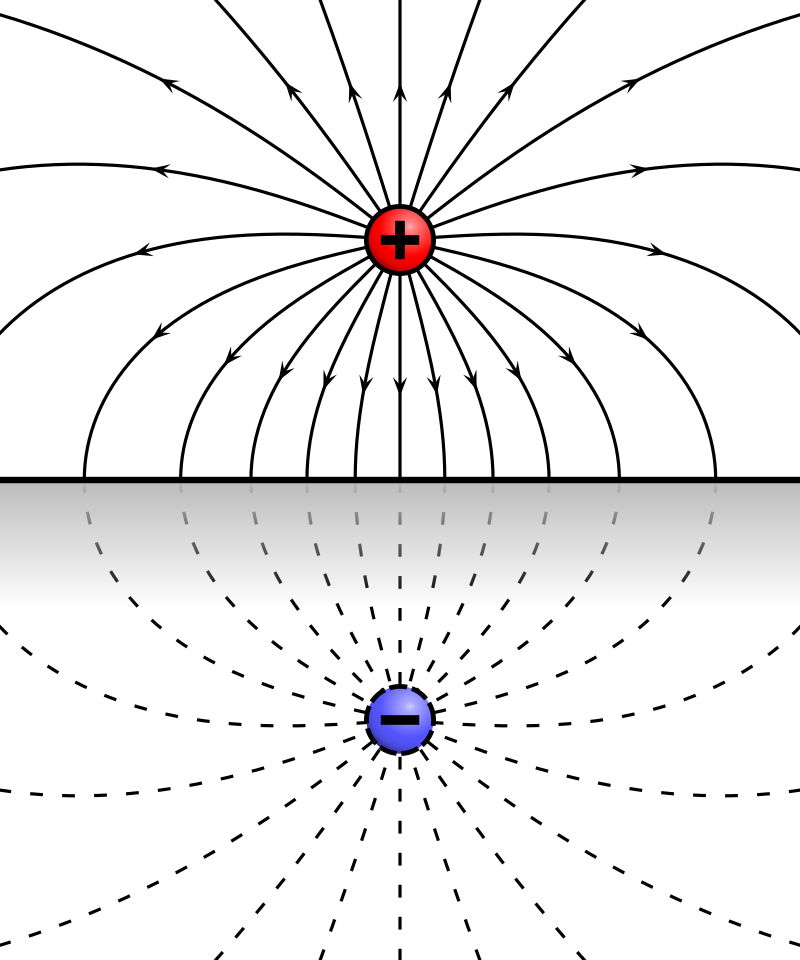 <br>
From wikipedia https://en.wikipedia.org/wiki/Method_of_image_charges

Due to uniqueness, the image charge accurately models the electric field created by the conductive plane. There is only one charge with one mass, but it behaves as though a twin is in the system.

## Overview

Throughout this worked problem we will go beyond the textbook by not only observing the electrostatic behavior of the charge, but also model motion though 3D space. We will first discuss a bit more setup for the situation and some of the physical laws/equations at play, as well as justify why the method of image charges can be used. Next we will make the equations of motion and develop an understanding of how charges are attracted to neutral conductors, as well as numerically model the situation. Honestly I have no idea how this is fj

<!-- We will also observe the affects of applying a global electric field to the system to observe oscillation. -->

## The physics at play.

From Griffiths E&M:

Voltage of a point charge (electron)
$$
V(r) = \frac{1}{4\pi \epsilon_0} \frac{q}{r}
$$

Electric field:
$$
E(r) = \frac{1}{4\pi \epsilon_0} \frac{q}{|r|^2} \hat r
$$

Boundary condition (infinite conducting plane): $V(z=0)=0$

For an electrostatic system this is already enough to understant the electric fields at play. For a charge at $(x, y, z)$, an image charge at $(x, y, -z)$ with opposite charge fulfils the boundary condition.



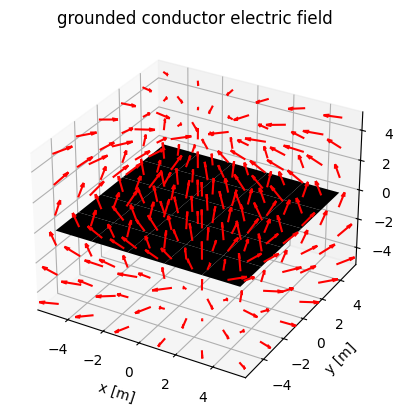

In [166]:
import matplotlib.pyplot as plt
import numpy as np

n2 = 6
x = np.linspace(-5, 5, n2)
y = np.linspace(-5, 5, n2)
z = np.linspace(-5, 5, n2)
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

def electric_field(charge, x_points, y_points, z_points, x_charge=0, y_charge=0, z_charge=0):
    k = 8.99e9  # Nm^2/C^2, Coulomb's constant
    
    # Initialize electric field components to zero
    E_x = np.zeros_like(x_points)
    E_y = np.zeros_like(y_points)
    E_z = np.zeros_like(z_points)
    
    # Calculate electric field components due to the point charge at each point on the grid
    for i in range(x_points.shape[0]):
        for j in range(y_points.shape[1]):
            for zed in range(z_points.shape[2]):
                r_x = x_points[i, j, zed] - x_charge
                r_y = y_points[i, j, zed] - y_charge
                r_z = z_points[i, j, zed] - z_charge
                r_magnitude = np.sqrt(r_x**2 + r_y**2 + r_z**2)
                if r_magnitude != 0:  # Avoid division by zero
                    r_unit_x = r_x / r_magnitude
                    r_unit_y = r_y / r_magnitude
                    r_unit_z = r_z / r_magnitude
                    E_x[i, j, zed] = k * charge * r_unit_x / r_magnitude**2
                    E_y[i, j, zed] = k * charge * r_unit_y / r_magnitude**2
                    E_z[i, j, zed] = k * charge * r_unit_z / r_magnitude**2
    
    return E_x, E_y, E_z

c1 = (-1.6e-19, 0, 0, 5)
c2 = (1.6e-19, 0, 0, -5)
chargelist = [c1, c2]

Ex_tot = 0
Ey_tot = 0
Ez_tot = 0

for charge in chargelist:
    q, cx, cy, cz = charge
    Ex, Ey, Ez = electric_field(q, X, Y, Z, cx, cy, cz)
    Ex_tot += Ex
    Ey_tot += Ey
    Ez_tot += Ez


ax = plt.figure().add_subplot(projection='3d')

ax.quiver(X, Y, Z, Ex_tot, Ey_tot, Ez_tot, length=1, normalize=True, color='r')
ax.set_title('Quiver Plot')
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_zlabel('z [m]')
ax.grid(color='gray', linestyle='--', linewidth=0.5)

Xplane, Yplane = np.meshgrid(x, y)
Zplane = Xplane*0
ax.plot_surface(Xplane, Yplane, Zplane, color = 'black')
plt.title('grounded conductor electric field');


Project done, right? Well, we're interested in observing a moving charge, which requires equations of motion and, importantly, magnetic fields. 

Before getting started, I will mention that there's a reason the method of images typically resides in electrostatics. Conductors do not behave the same with magnetic fields and changing fields as they do with static electric fields, and for most situations the method of images cannot be used. Fortunately in [this paper](http://kirkmcd.princeton.edu/examples/image_dipole.pdf), the author shows that for the infinite grounded plane in particular, the method of images does in fact work for moving charge distributions as the necessary boundary conditions are satisfied.


Full link: http://kirkmcd.princeton.edu/examples/image_dipole.pdf

## EOMs

The magnetic field produced by a moving charge (from Maxwell's equations #4 - zero flux):

$$
B = -\frac{\mu_0q}{4\pi |r|^2} \vec v \times \vec r 
$$

Negative since the image charge has $-q$ vs the actual charge

Our forces are

$$
F_E = q\vec E \\
F_B = q\vec v \times \vec B
$$

Yielding our EOMs

$$
m \ddot x = q \left( E_x + \dot y B_z - \dot z B_y \right) \\
\ddot x = \frac{q}{m} \left( E_x + \dot y B_z - \dot z B_y \right) \\
\ddot y = \frac{q}{m} \left( E_y + \dot z B_x - \dot x B_z \right) \\
\ddot z = \frac{q}{m} \left( E_z + \dot x B_y - \dot y B_x \right) \\

$$

Now, since our image charge position is defined completely by our real charge position, $E$ and $B$ are determined by the position and velocity of the real charge.

$$
E_{img} = -\frac{1}{4\pi\epsilon_0}\frac{q}{4z^2} \hat z \\
E_z = -\frac{1}{16\pi\epsilon_0}\frac{q}{z^2} \\
B_{img} = -\frac{\mu_0q}{16\pi z^2} \vec v \times \hat z = \frac{\mu_0q}{16\pi z^2} \left(\dot x \hat y - \dot y \hat x \right) \\
B_x = -\frac{\mu_0q}{16\pi z^2} \dot y \\
B_y = \frac{\mu_0q}{16\pi z^2} \dot x

$$

This lets us simplify our EOM
$$
\ddot x = -\frac{q^2}{m} \left( \dot z\dot x \frac{\mu_0}{16\pi z^2}  \right) \\
\ddot y = -\frac{q^2}{m} \left( \dot z\dot y \frac{\mu_0}{16\pi z^2}  \right) \\
\ddot z = \frac{q^2}{m} \left( -\frac{1}{16\pi\epsilon_0}\frac{1}{z^2} + \dot x^2 \frac{\mu_0}{16\pi z^2} + \dot y^2 \frac{\mu_0}{16\pi z^2} \right) \\
$$

Now these are some special equations of motion. For $z <0$ we'll flip the signs of each equation, since I only derived these equations for $\hat z$ pointing up. 

So, these aren't exactly analytical. It makes sense that forces in the $x$ and $y$ direction require parallel and $z$ velocity, since the magnetic force would only point on the electron-image axis. It also makes sense that the magnetic term always drives the two charges apart since opposite currents push each other apart.Let's check out what it looks like and see if it matches our intuition. 

In [167]:
from numpy import pi
from scipy.integrate import solve_ivp

def EOM(t, y0, params):
    ep0 = 8.85e-12
    mu0 = 4e-7*pi

    q, m = params


    x, y, z, vx, vy, vz = y0
    dx, dv, dz = vx, vy, vz

    if abs(z) < 1e-3:
        return dx, dv, dz, 0, 0, 0

    ddx = - q**2 / m * mu0  / (16*pi*z**2) * vz * vx
    ddy = - q**2 / m * mu0  / (16*pi*z**2) * vz * vy
    ddz = q**2/m * 1 / (16 * pi * z**2) * (-1/ep0 + vx**2*mu0 + vy**2*mu0)

    if z>0:
        return dx, dv, dz, ddx, ddy, ddz
    else:
        return dx, dv, dz, -ddx, -ddy, -ddz
    
q = 1.602e-19
m = 9.11e-31
params = (q, m)

t0 = 0
tf = 1
n = 100

tspan = (t0, tf)
t_eval = np.linspace(t0, tf, n)

y0 = (0, 0, 3.5, 0, 0, 0)
solution = solve_ivp(EOM, tspan, y0, t_eval=t_eval, args=[params])

solution.y[2]


array([ 3.5       ,  3.49973626,  3.49894498,  3.49762588,  3.49577857,
        3.49340252,  3.49049705,  3.48706129,  3.4830942 ,  3.47859455,
        3.47356095,  3.46799183,  3.46188543,  3.45523983,  3.44805293,
        3.44032244,  3.4320459 ,  3.4232207 ,  3.413844  ,  3.40391284,
        3.39342404,  3.38237426,  3.37072587,  3.35839687,  3.3453995 ,
        3.33174938,  3.3174605 ,  3.30254528,  3.2870145 ,  3.27087737,
        3.25414149,  3.23681285,  3.21889585,  3.20039327,  3.1813063 ,
        3.16163454,  3.14137597,  3.12052698,  3.09908235,  3.07703526,
        3.05437729,  3.03109843,  3.00718705,  2.98262992,  2.95741222,
        2.93151753,  2.9049278 ,  2.87762342,  2.84958315,  2.82078415,
        2.79120199,  2.76081063,  2.72958244,  2.69748817,  2.66449697,
        2.63057642,  2.59569245,  2.55980943,  2.52289011,  2.48489563,
        2.44578554,  2.40551779,  2.36404873,  2.32133309,  2.27732402,
        2.23197306,  2.18523014,  2.13704361,  2.0873602 ,  2.03

We're starting with 1D to make sure our tech is working right.

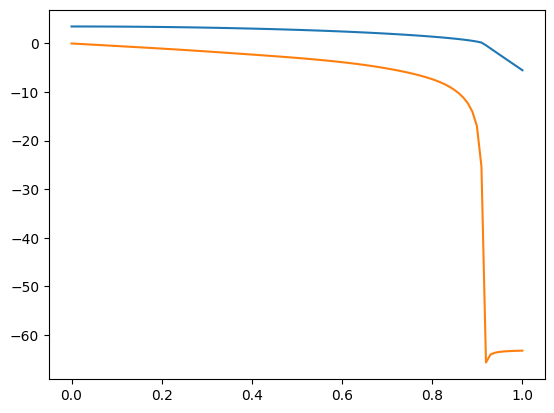

In [168]:
plt.plot(solution.t, solution.y[2])
plt.plot(solution.t, solution.y[5]);

As expected, the electron is attracted to it's image charge, and the grounded conductor produces an attractive force.

Something is causing velocity to jump around when z=0. Let's loosen up our restriction on minimum allowed $|z|$ for the force to occur. We'll chalk it up to the conductor being 1m thick, and also assume the electrons can still pass through it without being absorbed into the metal.

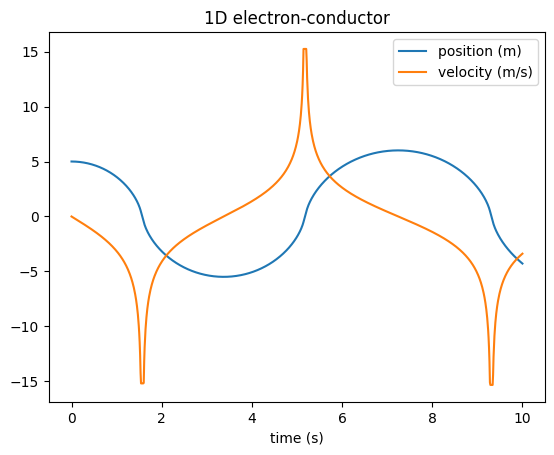

In [169]:
from numpy import pi
from scipy.integrate import solve_ivp

def EOM(t, y0, params):
    ep0 = 8.85e-12
    mu0 = 4e-7*pi

    q, m = params


    x, y, z, vx, vy, vz = y0
    dx, dv, dz = vx, vy, vz

    if abs(z) < 0.5:
        return dx, dv, dz, 0, 0, 0

    ddx = - q**2 / m * mu0  / (16*pi*z**2) * vz * vx
    ddy = - q**2 / m * mu0  / (16*pi*z**2) * vz * vy
    ddz = q**2/m * 1 / (16 * pi * z**2) * (-1/ep0 + vx**2*mu0 + vy**2*mu0)

    if z>0:
        return dx, dv, dz, ddx, ddy, ddz
    else:
        return dx, dv, dz, -ddx, -ddy, -ddz
    
q = 1.602e-19
m = 9.11e-31
params = (q, m)

t0 = 0
tf = 10 # a longer timespan
n = 1000 # a few more points

tspan = (t0, tf)
t_eval = np.linspace(t0, tf, n)

y0 = (0, 0, 5, 0, 0, 0)

# as we discussed before, RK doesn't always cut it
solution = solve_ivp(EOM, tspan, y0, t_eval=t_eval, args=[params], method='LSODA')

t = solution.t

plt.plot(t, solution.y[2], label='position (m)')
plt.plot(t, solution.y[5], label='velocity (m/s)')
plt.title('1D electron-conductor')
plt.legend()
plt.xlabel('time (s)');

Interestingly, the results vary greatly depending on where the cutoff $z$ value is. For $|z|<0.1$, we get

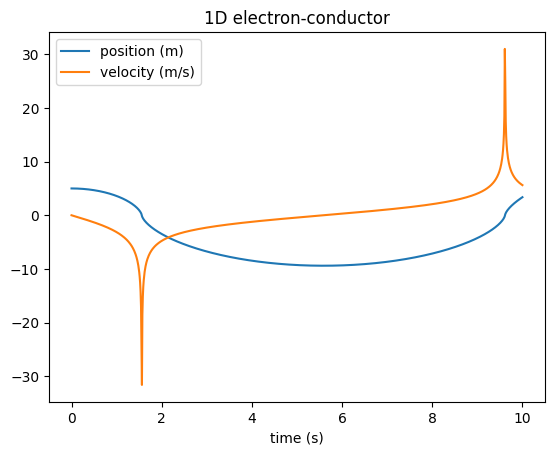

In [170]:
def EOM_01(t, y0, params):
    ep0 = 8.85e-12
    mu0 = 4e-7*pi

    q, m = params


    x, y, z, vx, vy, vz = y0
    dx, dv, dz = vx, vy, vz

    if abs(z) < 0.1:
        return dx, dv, dz, 0, 0, 0

    ddx = - q**2 / m * mu0  / (16*pi*z**2) * vz * vx
    ddy = - q**2 / m * mu0  / (16*pi*z**2) * vz * vy
    ddz = q**2/m * 1 / (16 * pi * z**2) * (-1/ep0 + vx**2*mu0 + vy**2*mu0)

    if z>0:
        return dx, dv, dz, ddx, ddy, ddz
    else:
        return dx, dv, dz, -ddx, -ddy, -ddz

t0 = 0
tf = 10 # a longer timespan
n = 1000 # a few more points

tspan = (t0, tf)
t_eval = np.linspace(t0, tf, n)

y0 = (0, 0, 5, 0, 0, 0)

# as we discussed before, RK doesn't always cut it
solution = solve_ivp(EOM_01, tspan, y0, t_eval=t_eval, args=[params], method='LSODA')

t = solution.t

plt.plot(t, solution.y[2], label='position (m)')
plt.plot(t, solution.y[5], label='velocity (m/s)')
plt.title('1D electron-conductor')
plt.legend()
plt.xlabel('time (s)');

It is unable to complete a single oscillation, despite having the same initial conditions. Unfortunately, we can't use this to describe thick conductors with constant internal voltage. Our boundary conditions only work for infinitely thin grounded conductors.

Let's get to looking at 3D (again returning to $\ddot z = 0$ for $|z|<0.5$)

In [171]:
t0 = 0
tf = 10 # a longer timespan
n = 1000 # a few more points

tspan = (t0, tf)
t_eval = np.linspace(t0, tf, n)

y0 = (-5, -5, 5, 1, 1, 1) #positive initial velocity in each direction

# as we discussed before, RK doesn't always cut it
solution = solve_ivp(EOM, tspan, y0, t_eval=t_eval, args=[params], method='LSODA')
solution.message

'The solver successfully reached the end of the integration interval.'

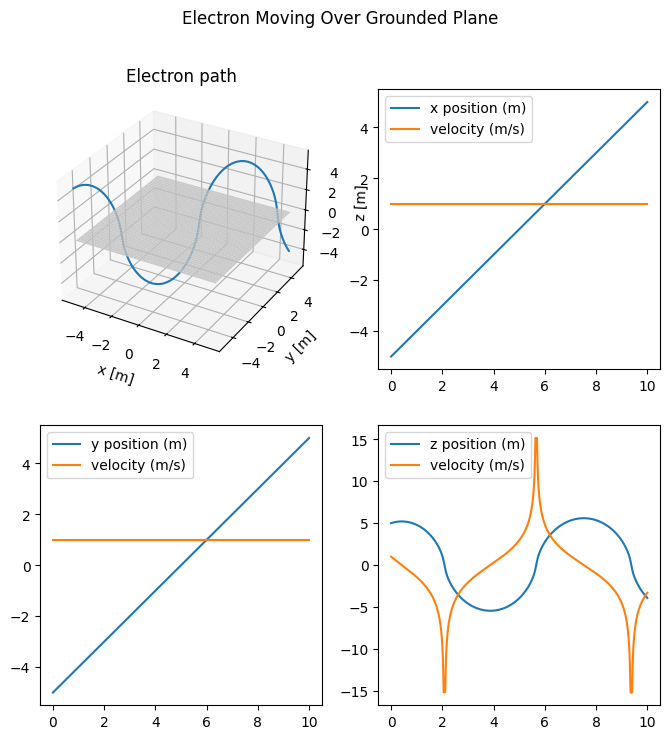

In [172]:
t = solution.t
x, y, z, vx, vy, vz = solution.y


fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(2, 2, 1, projection='3d')

ax.plot(solution.y[0], solution.y[1], solution.y[2])
ax.set_title('Electron path')
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_zlabel('z [m]')
ax.grid(color='gray', linestyle='--', linewidth=0.5)

Xplane, Yplane = np.meshgrid(x, y)
Zplane = Xplane*0
ax.plot_surface(Xplane, Yplane, Zplane, color = 'white', alpha=0.9)
plt.suptitle('Electron Moving Over Grounded Plane');

ax1 = fig.add_subplot(2, 2, 2)
ax1.plot(t, x, label='x position (m)')
ax1.plot(t, vx, label='velocity (m/s)')
ax1.legend()

ax2 = fig.add_subplot(2, 2, 3)
ax2.plot(t, y, label='y position (m)')
ax2.plot(t, vy, label='velocity (m/s)')
ax2.legend()

ax3 = fig.add_subplot(2, 2, 4)
ax3.plot(t, z, label='z position (m)')
ax3.plot(t, vz, label='velocity (m/s)')
ax3.legend();


Well that's unfortunate. What is happening?

In [173]:
EOM(0, y0, params)

(1, 1, 1, -2.8171284302963774e-17, -2.8171284302963774e-17, -2.533106864442827)

Our magnetic field strength is too low to make an impactful magnetic field. If we want to see some interesting dynamics, our ratio between $\ddot x$ and $\dot x$ has to be much closer. I didn't do the work to encorperate magnetic fields only for nothing interesting to occur, so I'm going to tweak $\mu_0$ so we can see something interesting happen, hopefully.

In [174]:
def EOM_tweaked(t, y0, params):
    ep0 = 8.85e-12
    mu0 = 4e+2*pi

    q, m = params


    x, y, z, vx, vy, vz = y0
    dx, dv, dz = vx, vy, vz

    if abs(z) < 0.5:
        return dx, dv, dz, 0, 0, 0

    ddx = - q**2 / m * mu0  / (16*pi*z**2) * vz * vx
    ddy = - q**2 / m * mu0  / (16*pi*z**2) * vz * vy
    ddz = q**2/m * 1 / (16 * pi * z**2) * (-1/ep0 + vx**2*mu0 + vy**2*mu0)

    if z>0:
        return dx, dv, dz, ddx, ddy, ddz
    else:
        return dx, dv, dz, -ddx, -ddy, -ddz
    

t0 = 0
tf = 10 # a longer timespan
n = 1000 # a few more points

tspan = (t0, tf)
t_eval = np.linspace(t0, tf, n)

y0 = (-5, -5, 5, 1, 1, 1) #positive initial velocity in each direction

solution = solve_ivp(EOM_tweaked, tspan, y0, t_eval=t_eval, args=[params])
solution.message


'The solver successfully reached the end of the integration interval.'

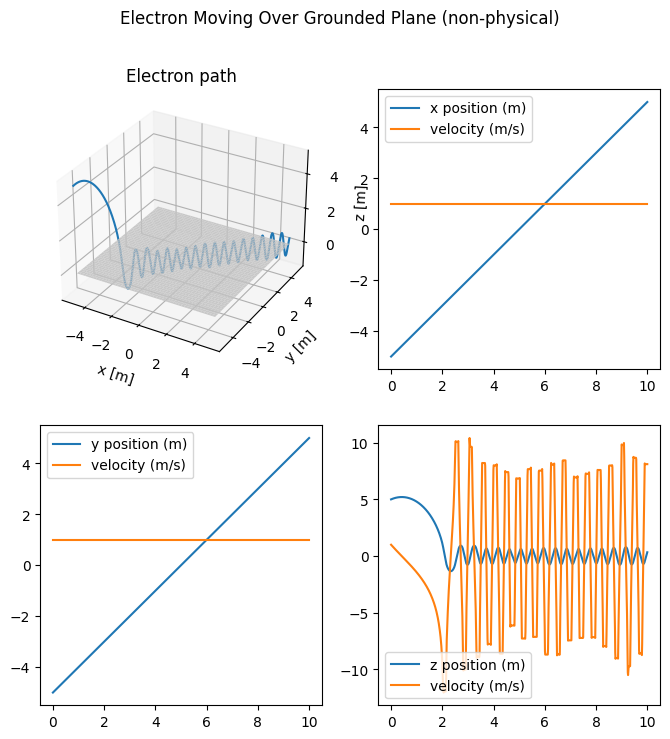

In [175]:
t = solution.t
x, y, z, vx, vy, vz = solution.y


fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(2, 2, 1, projection='3d')

ax.plot(solution.y[0], solution.y[1], solution.y[2])
ax.set_title('Electron path')
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_zlabel('z [m]')
ax.grid(color='gray', linestyle='--', linewidth=0.5)

Xplane, Yplane = np.meshgrid(x, y)
Zplane = Xplane*0
ax.plot_surface(Xplane, Yplane, Zplane, color = 'white', alpha=0.9)
plt.suptitle('Electron Moving Over Grounded Plane (non-physical)');

ax1 = fig.add_subplot(2, 2, 2)
ax1.plot(t, x, label='x position (m)')
ax1.plot(t, vx, label='velocity (m/s)')
ax1.legend()

ax2 = fig.add_subplot(2, 2, 3)
ax2.plot(t, y, label='y position (m)')
ax2.plot(t, vy, label='velocity (m/s)')
ax2.legend()

ax3 = fig.add_subplot(2, 2, 4)
ax3.plot(t, z, label='z position (m)')
ax3.plot(t, vz, label='velocity (m/s)')
ax3.legend();


The change in the magnetic constant has a larger affect on $z$ than $x$ or $y$. This is likely due to the $\dot z^2$ term and the fact that it is further fueled by the electron voltage. This may not represent a physical system, but it is still interesting to see how the system unfolds. For the sake of completeness, let's check out when $\dot x$ and $\dot y$ are very large with the correct value of $\mu_0$

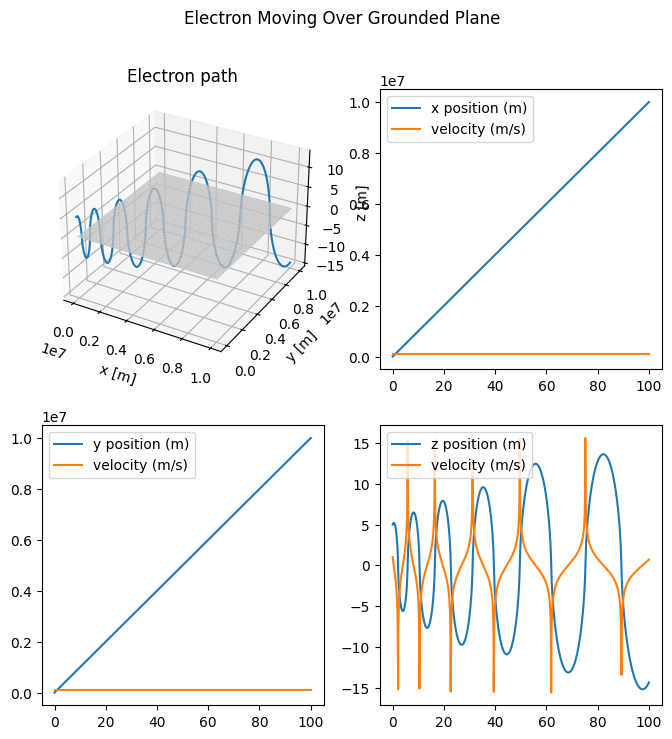

In [182]:
t0 = 0
tf = 100 # a longer timespan may show the affects of the magnetic field
n = 1000

tspan = (t0, tf)
t_eval = np.linspace(t0, tf, n)

y0 = (0, 0, 5, 1e5, 1e5, 1) 

solution = solve_ivp(EOM, tspan, y0, t_eval=t_eval, args=[params], method='LSODA')
t = solution.t
x, y, z, vx, vy, vz = solution.y


fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(2, 2, 1, projection='3d')

ax.plot(solution.y[0], solution.y[1], solution.y[2])
ax.set_title('Electron path')
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_zlabel('z [m]')
ax.grid(color='gray', linestyle='--', linewidth=0.5)

Xplane, Yplane = np.meshgrid(x, y)
Zplane = Xplane*0
ax.plot_surface(Xplane, Yplane, Zplane, color = 'white', alpha=0.9)
plt.suptitle('Electron Moving Over Grounded Plane');

ax1 = fig.add_subplot(2, 2, 2)
ax1.plot(t, x, label='x position (m)')
ax1.plot(t, vx, label='velocity (m/s)')
ax1.legend()

ax2 = fig.add_subplot(2, 2, 3)
ax2.plot(t, y, label='y position (m)')
ax2.plot(t, vy, label='velocity (m/s)')
ax2.legend()

ax3 = fig.add_subplot(2, 2, 4)
ax3.plot(t, z, label='z position (m)')
ax3.plot(t, vz, label='velocity (m/s)')
ax3.legend();


With an increased timespan and relativistic speeds (dilation not included), the electron and its image actually do push against each other